In [22]:
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
from scipy.io import wavfile
from scipy.signal import savgol_filter

In [16]:
frames = 512
buffer = np.zeros(frames * 4)
padding = len(buffer) * 2
possible_notes = ['E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#']
possible_tokens = [f'{i}_short' for i in possible_notes] + [f'{i}_long' for i in possible_notes]

In [17]:
def hps(y, samplerate, harmonics = 5): # https://github.com/TomSchimansky/GuitarTuner/blob/master/tuner_audio/audio_analyzer.py

    buffer[:-frames] = buffer[frames:]
    if frames != len(y):
        buffer[-frames:-(frames - len(y))] = y
    else:
        buffer[-frames:] = y

    # applying hanning window to reduce spectral leakage
    window = np.array(buffer) * np.hanning(len(buffer))

    # zero padding
    amplitudes = np.abs(np.fft.fft(np.pad(window, (0, len(buffer) * 2))))
    # only use the first half of the fft output data
    amplitudes = amplitudes[:int(len(amplitudes) / 2)]

    frequencies = np.fft.fftfreq(len(amplitudes) * 2, 1 / samplerate)

    # HPS: multiply data by itself with different scalings (Harmonic Product Spectrum)
    hps_spectrum = amplitudes.copy()
    for i in range(2, harmonics + 1):
        multiples = amplitudes[::i] 
        hps_spectrum[:len(multiples)] *= amplitudes[::i]

    return frequencies[np.argmax(hps_spectrum)]

In [18]:
samplerate, data = wavfile.read('Kalyani 9 Ata talam.wav')
data.shape

(5917632, 2)

In [19]:
data = data[:, 0]
l = data.shape[0]
data = data[:l // 12]

In [20]:
frequencies = []

for i in range(0, len(data), frames):
    freq = hps(data[i:i + frames], samplerate)
    frequencies.append(freq)

frequencies = np.array(frequencies)

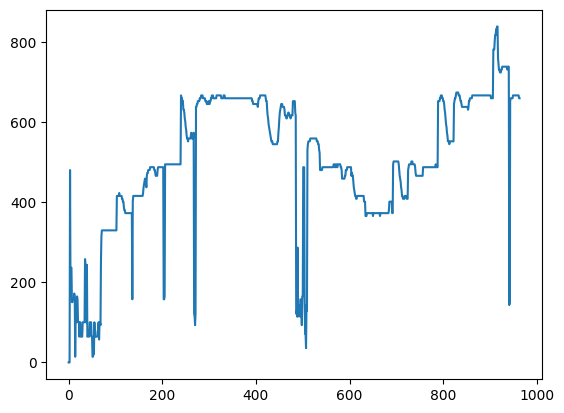

In [21]:
plt.plot(frequencies)

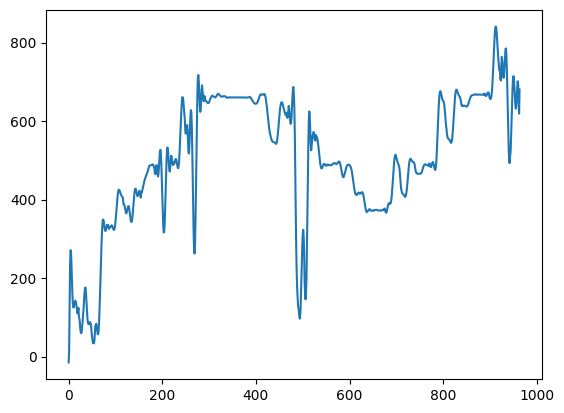

In [42]:
adj = savgol_filter(frequencies, 40, 10)
plt.plot(adj)